# Test implementation of PhenomD fit

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from Welsh Puck (aka pwca).


## Find and load simulation data

In [2]:
# Find a simulation 
A = scsearch(keyword='hrq',nonspinning=True,verbose=True,q=2,unique=True)

(scsearch)>> Found keyword (=hrq) keyword.
(scsearch)>> Found nonspinning (=True) keyword.
(scsearch)>> Found q (=2) keyword.
(scsearch)>> Found unique (=True) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 unique simulations:
[0001][bradwr] HRq-series: ns-q2.00	(D9_q2.0_a0.0_m160)



In [3]:
# Load waveform
y = gwylm(A[0],lm=(2,2),verbose=True,pad=500,dt=0.5,clean=True)

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.5) keyword.
(gwylm)>> Found enforce_m_relative_sign_convention (=True) keyword.
(gwylm)>> Found lm (=(2, 2)) keyword.
(gwylm)>> Found load_dynamics (=True) keyword.
(gwylm)>> Found pad (=500) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x11c43f870>) keyword.
(gwylm)>> Found use_tortoise_for_dynamics (=True) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (75.0,None), which differs from the config values of (75,0). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2)]
(load)>> Using the default extraction_parameter of 75
(load)>> Using the default level of 75
(load)>> Loading: mp_WeylScal4::Psi4i_l2_m2_r75.00.asc
(load)>> Padd

## Generate PhenomD amplitude and phase derivative

In [119]:

# Pull information from gwylm object
m1, m2, chi1, chi2, chip = y.m1, y.m2, y.X1[-1], y.X2[-1], 0

# Use external code to generate function which generates a PhenomD amplitude plus corrections which are zero by default
f = y.f[ y.f>0 ]
template_amp = pwca.ansatz.template_amp_mrd(m1, m2, chi1, chi2, chip)
template_phi = pwca.ansatz.template_dphi_mrd(m1, m2, chi1, chi2, chip)

# NOTE that the template functions also take in parameters that deviate from the PhenomD values
amp  = template_amp(f,include_pn_factor=True)
dphi = template_phi(f,include_pn_factor=True)



## Demonstrate correct implementation of PhenomD

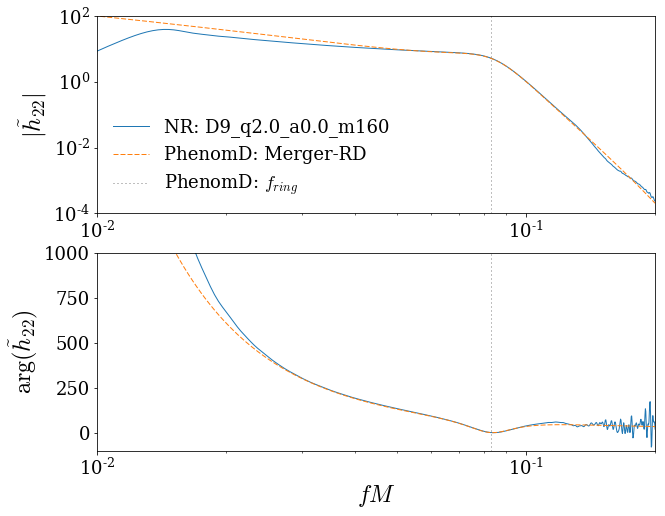

In [120]:

fig = figure( figsize=2*figaspect(0.8) )
lw = 1

subplot(2,1,1)
# ---

plot( y.f, y[2,2]['strain'].fd_amp, lw=lw, label='NR: %s'%y.simname )
plot( f, amp, '--', lw=lw, label='PhenomD: Merger-RD' )

xscale('log')
yscale('log')

axvline( fring, color='k', alpha=0.5, ls=':', lw=lw, label=r'PhenomD: $f_{ring}$' )

ylim(1e-4,1e2)
xlim( 1e-2,0.2 )

# xlabel('$fM$')
ylabel(r'$|\tilde{h}_{22}|$')

legend()

subplot(2,1,2)
# ---

#
shift = y[2,2]['psi4'].fd_dphi[find(y.f>fring)[0]]
fd_dphi = y[2,2]['psi4'].fd_dphi-shift

shift = dphi[find(f>fring)[0]]
dphi_ = dphi-shift

plot( y.f, fd_dphi, lw=lw, label='NR: %s'%y.simname )
plot( f, dphi_, '--', lw=lw, label='PhenomD: Merger-RD' )

xscale('log')
# yscale('log')

axvline( fring, color='k', alpha=0.5, ls=':', lw=lw, label=r'PhenomD: $f_{ring}$' )

ylim(  lim( fd_dphi[ (y.f>0.01)&(y.f<0.2) ] )  )
xlim( 1e-2,0.2 )
ylim(-1e2,1e3)

ylabel(r'$\arg(\tilde{h}_{22})$')
xlabel('$fM$');
